## Sprint17 公開されている実装を動かす

#### 1.このSprintについて

##### Sprintの目的
公開されている実装を動かす際のノウハウを得る  
論文で読んだ手法を動かしてみる  

##### どのように学ぶか
論文で読んだ手法の公開されている実装を実際に動かしていきます。

#### 2.Faster R-CNN
Faster R-CNN[1]の実装を動かします。

[1]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99

https://arxiv.org/pdf/1506.01497.pdf

以下のものを使用してください。Kerasを使用した実装です。  
duckrabbits/ObjectDetection at master

### 【問題1】学習と推定
READMEを参考に上記実装を動かしてください。

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

os.chdir('/content/drive/My Drive/Sprint17_FASTER_RCNN')
print(os.getcwd())

/content/drive/My Drive/Sprint17_FASTER_RCNN


In [0]:
!unzip the-simpsons-characters-dataset.zip  -d Simpsons

In [0]:
# train用のデータセットを解凍

!unzip /content/Simpsons/simpsons_dataset.zip

In [0]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 4), reused 17 (delta 1), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [0]:
!mv /content/drive/"My Drive"/Sprint17_FASTER_RCNN/Simpsons/simpsons_dataset /content/drive/"My Drive"/Sprint17_FASTER_RCNN/ObjectDetection

In [0]:
!cp -r /content/drive/"My Drive"/Sprint17_FASTER_RCNN/ObjectDetection/simpsons_dataset /content/drive/"My Drive"/Sprint17_FASTER_RCNN/Simpsons

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
cp: cannot stat '/content/drive/My Drive/Sprint17_FASTER_RCNN/ObjectDetection/simpsons_dataset': No such file or directory


In [0]:
import os
os.chdir('/content/drive/My Drive/Sprint17_FASTER_RCNN/ObjectDetection')
print(os.getcwd())

/content/drive/My Drive/Sprint17_FASTER_RCNN/ObjectDetection


In [0]:
!python train.py --n_epochs=10 -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20191007-051648_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
2019-10-07 05:51:30.530501: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2019-10-07 05:51:30.533510: I tensorflow/compiler/xla/service/service.cc:168] XLA service 

In [0]:
!python predict.py -i /content/drive/"My Drive"/Sprint17_FASTER_RCNN/ObjectDetection/testset_abraham_grampa -c /content/drive/"My Drive"/Sprint17_FASTER_RCNN/ObjectDetection/save/train_20191007-051648_config.pickle

Using TensorFlow backend.








2019-10-07 07:30:15.014637: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2019-10-07 07:30:15.015188: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x9207d40 executing computations on platform Host. Devices:
2019-10-07 07:30:15.015224: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-10-07 07:30:15.017269: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2019-10-07 07:30:15.092363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-10-07 07:30:15.093230: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xa2ebf80 executing computations on platform CUDA. Devices:
2019-10-07 07:30:15.093257: I tensorflow/compiler/xla/ser

### 【問題2】論文と実装の対応
コードリーディングを行ってください。  
まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

##### （例）  
RPNを実現しているコードはどこか RoIプーリングを実現しているコードはどこか フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。

オリジナルのKerasレイヤーを作成する - Keras Documentation

##### 《参考》
KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。

Applications - Keras Documentation

【解答】  
RoiPoolingConv.pyのファイルでRoiプーリングを行なっている

In [ ]:
Roipooling
    def compute_output_shape(self, input_shape):
        if self.dim_ordering == 'th':
            return None, self.num_rois, self.nb_channels, self.pool_size, self.pool_size
        else:
            return None, self.num_rois, self.pool_size, self.pool_size, self.nb_channels
def call(self, x, mask=None):



    assert(len(x) == 2)

    img = x[0]
    rois = x[1]

    input_shape = K.shape(img)

    outputs = []

    for roi_idx in range(self.num_rois):

        x = rois[0, roi_idx, 0]
        y = rois[0, roi_idx, 1]
        w = rois[0, roi_idx, 2]
        h = rois[0, roi_idx, 3]

        row_length = w / float(self.pool_size)
        col_length = h / float(self.pool_size)

        num_pool_regions = self.pool_size

        #NOTE: the RoiPooling implementation differs between theano and tensorflow due to the lack of a resize op
        # in theano. The theano implementation is much less efficient and leads to long compile times

        if self.dim_ordering == 'th':
            for jy in range(num_pool_regions):
                for ix in range(num_pool_regions):
                    x1 = x + ix * row_length
                    x2 = x1 + row_length
                    y1 = y + jy * col_length
                    y2 = y1 + col_length

                    x1 = K.cast(x1, 'int32')
                    x2 = K.cast(x2, 'int32')
                    y1 = K.cast(y1, 'int32')
                    y2 = K.cast(y2, 'int32')
                    x2 = x1 + K.maximum(1,x2-x1)
                    y2 = y1 + K.maximum(1,y2-y1)

                    new_shape = [input_shape[0], input_shape[1],
                                 y2 - y1, x2 - x1]

                    x_crop = img[:, :, y1:y2, x1:x2]
                    xm = K.reshape(x_crop, new_shape)
                    pooled_val = K.max(xm, axis=(2, 3))
                    outputs.append(pooled_val)

        elif self.dim_ordering == 'tf':
            x = K.cast(x, 'int32')
            y = K.cast(y, 'int32')
            w = K.cast(w, 'int32')
            h = K.cast(h, 'int32')

            rs = tf.image.resize_images(img[:, y:y+h, x:x+w, :], (self.pool_size, self.pool_size))
            outputs.append(rs)

    final_output = K.concatenate(outputs, axis=0)
    final_output = K.reshape(final_output, (1, self.num_rois, self.pool_size, self.pool_size, self.nb_channels))

    if self.dim_ordering == 'th':
        final_output = K.permute_dimensions(final_output, (0, 1, 4, 2, 3))
    else:
        final_output = K.permute_dimensions(final_output, (0, 1, 2, 3, 4))

    return final_output


RoiPoolingConv.pyでRoiプーリングを行なっている
conpute_output_shapeで出力する形を作る
callでpoolingを行なっている
最後にreshapeして出力サイズに合わせている

In [ ]:
RPN
def main():
    args = parser.parse_args()
    time_stamp = "{0:%Y%m%d-%H%M%S}".format(datetime.now())
    save_name = os.path.join(args.savedir, "train{}".format(time_stamp))

省略


model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)

faster_rcnnからrpnを受け取っている


def rpn(base_layers,num_anchors):

x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)

x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

return [x_class, x_regr, base_layers]
faster_rcnnはresnetからrpnをうけとっている。
元のrpnは上記のコードである

畳み込み層を通して、分類と回帰問題のネットワークに送っている  
num_anchorsはconfig.pyで指定している

def get_model(C, classes_count):
img_input = Input(shape=(None, None, 3)
省略

 model_rpn.compile(optimizer=Adam(lr=1e-4), loss=[losses.rpn_loss_cls(num_anchors), losses.rpn_loss_regr(num_anchors)])
model_classifier.compile(optimizer=Adam(lr=1e-4), loss=[losses.class_loss_cls, losses.class_loss_regr(len(classes_count)-1)], 
metrics={'dense_class_{}'.format(len(classes_count)): 'accuracy'})
model_all.compile(optimizer='sgd', loss='mae')

rpnから出力された値を用いてkerasのモデルを作り、lossとしてlossesから分類と回帰のロスを計算している

def main():
args = parser.parse_args()
time_stamp = "{0:%Y%m%d-%H%M%S}".format(datetime.now())
save_name = os.path.join(args.save_dir, "train_{}".format(time_stamp))
省略

 while True:
            try:
                if len(rpn_accuracy_rpn_monitor) == args.n_iters and C.verbose:
                    mean_overlapping_bboxes = float(sum(rpn_accuracy_rpn_monitor))/len(rpn_accuracy_rpn_monitor)
                    rpn_accuracy_rpn_monitor = []
                    print('Average number of overlapping bounding boxes from RPN = {} for {} previous 
                    iterations'.format(mean_overlapping_bboxes, args.n_iters))
                    if mean_overlapping_bboxes == 0:
                        print('RPN is not producing bounding boxes that overlap the ground truth boxes. Check RPN settings or keep
                        training.')
                X, Y, img_data = next(data_gen_train)

                loss_rpn = model_rpn.train_on_batch(X, Y)
                P_rpn = model_rpn.predict_on_batch(X)
                R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], C, K.image_dim_ordering(), use_regr=True, overlap_thresh=0.7, 
                max_boxes=300)

                ここでrpnモデルの学習を行なっている
                そして、推定を行いRoi poolingに送っている

In [ ]:
model
 model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)
model_allでrpnと分類を合わせたモデルを作成


model_all.save_weights(C.model_path)
                        break


モデルを学習させ重みを保存した

#### 3.YOLOv3
シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。

qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)  
[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement

https://pjreddie.com/media/files/papers/YOLOv3.pdf


### 【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。 まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。 出力結果を課題の一部として提出してください。

In [0]:
import os
os.chdir('/content/drive/My Drive')
print(os.getcwd())

/content/drive/My Drive


In [0]:
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 150.95 KiB | 5.03 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [16]:
import os
os.chdir('/content/drive/My Drive/keras-yolo3')
print(os.getcwd())

/content/drive/My Drive/keras-yolo3


In [6]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2019-10-31 02:03:51.267813: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-10-31 02:03:51.268140: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1b5b640 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-10-31 02:03:51.268177: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-10-31 02:03:51.273678: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-10-31 02:03:51.432295: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node

In [13]:
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2019-10-31 02:55:50.057344: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-10-31 02:55:50.057554: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2999640 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-10-31 02:55:50.057590: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-10-31 02:55:50.059498: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-10-31 02:55:50.138310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-10-31 02:55:50.139267: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x66

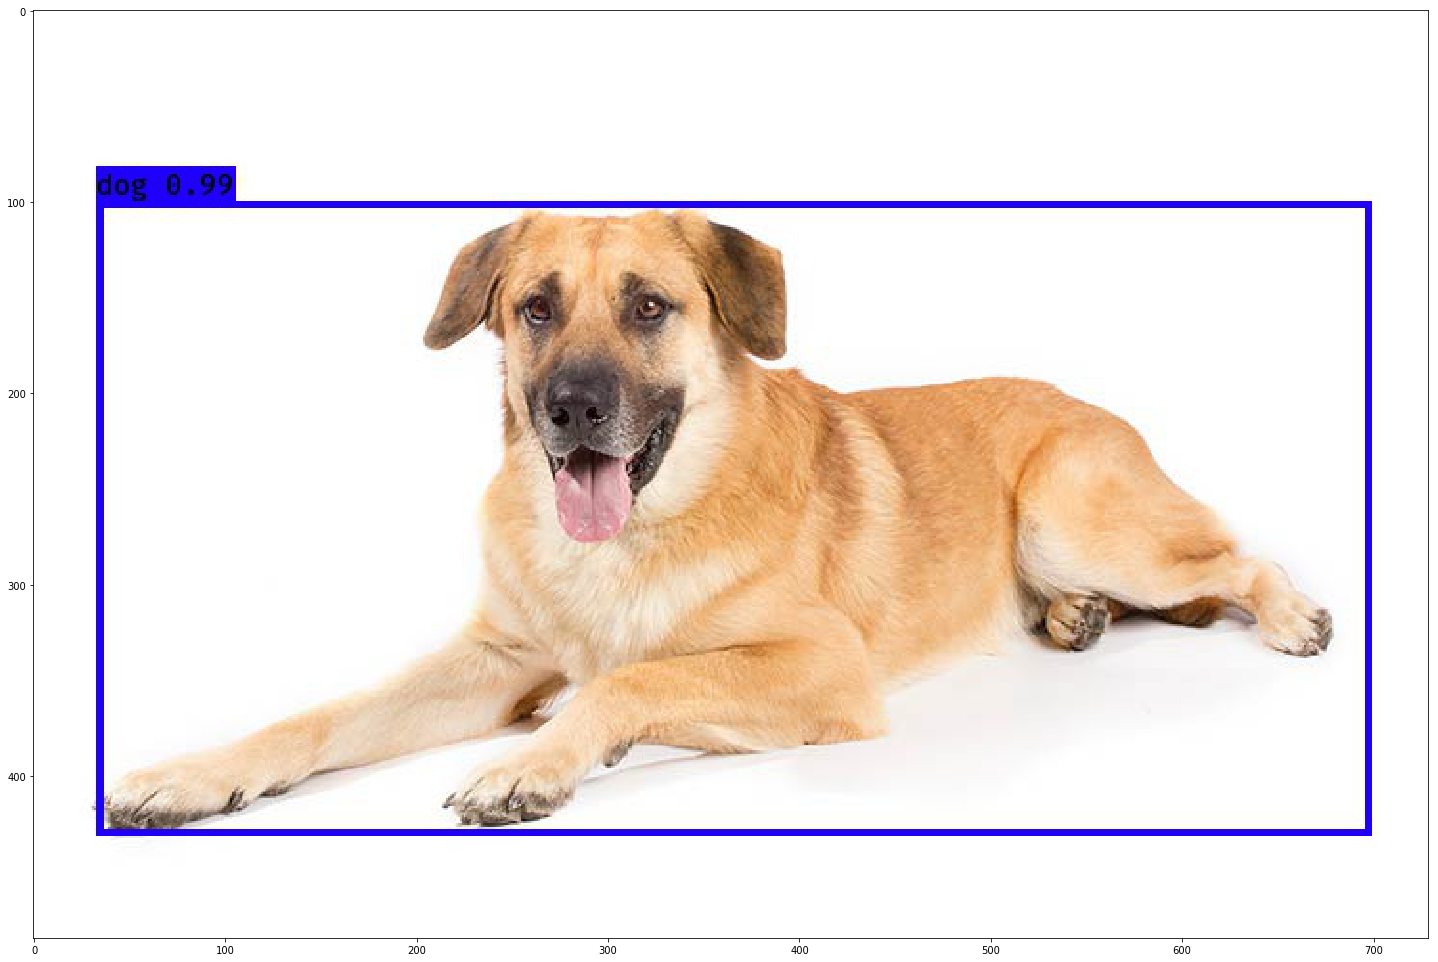

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
im = Image.open(r"C:/Users\anai/dive/TEST_upload3/diveintocode-ml/Sprint17_yoro_predict.jpg")
im_list = np.asarray(im)
plt.figure(figsize=(25, 25))
plt.imshow(im_list)
plt.show()

### 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。 アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。

In [ ]:
#train.txtの中身
/abraham_grampa_simpson/pic_0000.jpg 57,72,52,72,1
/abraham_grampa_simpson/pic_0001.jpg 80,31,337,354,2
/abraham_grampa_simpson/pic_0002.jpg 128,48,285,407,3
/abraham_grampa_simpson/pic_0003.jpg 72,126,158,275,4
/abraham_grampa_simpson/pic_0004.jpg 123,61,294,416,5
/abraham_grampa_simpson/pic_0005.jpg 115,18,498,413,6

### 【問題5】学習が行えることの確認
問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [20]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2019-10-31 05:07:35.369963: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-10-31 05:07:35.370191: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1889640 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-10-31 05:07:35.370229: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-10-31 05:07:35.372285: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-10-31 05:07:35.444321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node

In [32]:
!python train.py

Using TensorFlow backend.








2019-10-31 05:51:41.298202: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-10-31 05:51:41.298432: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x12cb640 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2019-10-31 05:51:41.298470: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2019-10-31 05:51:41.300449: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-10-31 05:51:41.375634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-10-31 05:51:41.376474: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4f841c0 initialized for platform CUDA (this does not guarantee that XLA will be u